## Image Classification 
###  [Challenge on Kaggle](https://www.kaggle.com/c/gdg-manouba-challenge/leaderboard)

#### Importing Librairies

In [1]:
import glob
import cv2
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from os import walk
import warnings
warnings.filterwarnings("ignore")

#### Importing Train images

In [2]:
images = [cv2.imread(file) for file in glob.glob("train/*.png")]

#### Quick Plot of an image

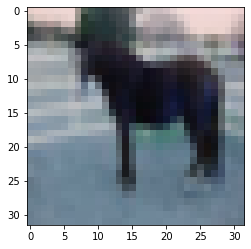

In [3]:
plt.imshow(images[0])

#### Images classes are in the pictures names, these classes are : Dog, Cat, Bird, Hourse, Deer, Frog, Truck, Ship,Airplane,Automobile,

In [4]:
f = []
for (dirpath, dirnames, filenames) in walk("train/"):
    f.extend(filenames)
    break

In [5]:
f[:5]

['24346_horse.png',
 '3777_ship.png',
 '34844_horse.png',
 '20247_horse.png',
 '24947_dog.png']

#### Now we will remove the number and .png

In [6]:
names = []
for name in f:
    name=name[name.find('_')+1:]
    name=name.replace(".png","")
    names.append(name)
    

In [7]:
names[:5]

['horse', 'ship', 'horse', 'horse', 'dog']

### A colored image is presented with 3 matrices, for Red, Green and Blue. The matrix dimension is the same as the image dimension in pixels. each pixel can take a value from 0 to 255. We will devide each value in every matrix by 255 to normalize its values

In [8]:
train = []
for image in images:
    image=image/255
    train.append(image)

#### Before training the model, first we will use a technique called 'One-hot Encoding'. In short, we will be presenting each class with a vector with a single value set to '1' while others are set to '0'

In [9]:
# define example
values = array(names)
print(values)

['horse' 'ship' 'horse' ... 'deer' 'bird' 'bird']


In [10]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(names)
print(integer_encoded)

[7 8 7 ... 4 2 2]


In [11]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [12]:
#Convert the list to an array
onehot_encoded = np.array(onehot_encoded[:50000])

In [13]:
Train = np.array(train)

In [14]:
Train=Train.astype('float32')

In [15]:
import keras as keras
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.layers import Dense, Activation,MaxPooling2D,Dropout,Flatten
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


#### We will use a 2D convolution neural network model, composed of : 
1. __Conv2D:__ 2D convolution layer
2. __MaxPooling2D:__ Check [Here](https://www.quora.com/What-is-max-pooling-in-convolutional-neural-networks) for more explanation 
3. __Dropout:__ randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.
4. __Flatten:__ transform a two-dimensional matrix of features into a vector
5. __Dense:__ it is used to change the dimensions of your vector (apply a Rotation), we use __Softmax__ in the last layer to map the non-normalized output of our network to a probability distribution over predicted output classes.
#### You can check [Keras documentation](https://keras.io) for more details 


In [16]:
model = Sequential()

model.add(Conv2D(32,(3,3),  padding='same', activation='relu', input_shape=(32, 32,3))) 
#Image representation : 32px*32px for 3 matrices    
model.add(Conv2D(32, (3,3), padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))# (16,16,32)
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),   padding='same', activation='relu'))   
model.add(Conv2D(64, (3,3),  padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))# (8,8,64)
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),   padding='same', activation='relu'))   
model.add(Conv2D(64, (3,3),  padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))# (4,4,128)
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))   # Final Layer using Softmax


Instructions for updating:
Colocations handled automatically by placer.


#### Compile and check the model summary

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

#### We train the model with 80% of our data, and use the 20% remaining for validation

In [19]:
hist = model.fit(Train,onehot_encoded,batch_size=32,epochs=50,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 96s 2ms/step - loss: 1.7147 - accuracy: 0.3646 - val_loss: 1.2973 - val_accuracy: 0.5279
Epoch 2/50
40000/40000 [==============================] - 80s 2ms/step - loss: 1.2802 - accuracy: 0.5361 - val_loss: 1.0918 - val_accuracy: 0.6068
Epoch 3/50
40000/40000 [==============================] - 71s 2ms/step - loss: 1.1182 - accuracy: 0.5986 - val_loss: 1.0105 - val_accuracy: 0.6356
Epoch 4/50
40000/40000 [==============================] - 68s 2ms/step - loss: 1.0149 - accuracy: 0.6376 - val_loss: 0.8779 - val_accuracy: 0.6839
Epoch 5/50
40000/40000 [==============================] - 68s 2ms/step - loss: 0.9466 - accuracy: 0.6647 - val_loss: 0.8414 - val_accuracy: 0.7059
Epoch 6/50
40000/40000 [==============================] - 68s 2ms/step - loss: 0.8931 - accuracy: 0.6831 - val_loss: 0.8640 - val_accuracy: 0.6963
Epoch 7/50
40000/400

#### We've reached an accurency of 78% based on the validation data

#### We save the model future user or further improvement

In [20]:
model.save('model.bin')

#### Now we load the test data, and predict the results

In [36]:
Test=[]
for i in range (10000):
    path = "test/"+ str(i) + ".png"
    img = cv2.imread(path)/255
    Test.append(img)

In [37]:
Test=np.array(Test).astype('float32')

In [38]:
preds=model.predict_classes(Test)

#### Now we reverse the encoding to restore each class name as demanded

In [40]:
Pred=list(label_encoder.inverse_transform(preds))

#### Let's write the submission file

In [42]:
Sub = pd.read_csv('submission.csv')

In [43]:
for i in range (len(Preds)):
    Sub.at[i,'label']=Preds[i]

In [44]:
Sub.index=Sub.index.astype('int')

In [45]:
Sub.head()

,index,label
0,0,cat
1,1,ship
2,2,ship
3,3,airplane
4,4,frog


In [46]:
Sub.to_csv('Submission.csv',index=False)

#### Our submission got 78.32%, wich is identical to our training results
![alt text](Submission.png )

### This model can be further improved, by adding more layers, adjusting some parameters, so feel free to try it yourself 